In [4]:

#impoortation des librairies
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
#définition du fichier de travail et fractionnement des données pour la reconnaissance des chiffres manuscrits
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

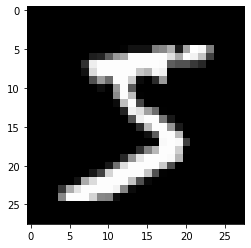

In [3]:
plt.imshow(x_train[0], cmap="gray") # Importation de l'image
plt.show() # visualisation de la première image

**Avant d'introduire les données dans le réseau de neurones, nous devons le normaliser en mettant à l'échelle la 
valeur des pixels dans une plage de 0 à 1 au lieu d'être de 0 à 255 et cela rend le réseau de neurones a besoin de 
moins de puissance de calcul**

In [4]:
# Normalisation du jeu de données d'apprentissage
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalisation du jeu de test
x_test = tf.keras.utils.normalize(x_test, axis=1)

**On va construire le modèle ou le réseau de neurones qui va entraîner et apprendre à classer ces images.
On utilise les couches qui vont être utilisées pour la consuction d'un réseau neuronal artificiel, car elles 
extrairont les caractéristiques des données.**

*On comence par créer un objet modèle qui vous permet d'ajouter les différentes couches.
Puis,on va aplatir les données qui sont les pixels de l'image dans ce cas. Ainsi, les images ont une dimension 
de 28 × 28, nous devons la rendre 1 × 784 dimensionnelle pour que la couche d'entrée du réseau neuronal puisse 
la lire ou la gérer. 
Enfin, on définit l'entrée et une couche cachée avec 128 neurones et une fonction d'activation qui est la fonction
relu.**

**On crée la couche de sortie avec 10 neurones et une fonction d'activation softmax qui transformera le score renvoyé
par le modèle en une valeur afin qu'il soit interprété par les humains.**

In [5]:
#Construction du modèle
model = tf.keras.models.Sequential()
# on applatit les données
model.add(tf.keras.layers.Flatten())
# Définition de l'entrée et de la couche cachée
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Construction de la couche de sortie
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Après avoir construit le réseau neuronal, on doit compiler le modèle en ajoutant quelques paramètres qui 
indiqueront au réseau neuronal comment démarrer le processus d'entraînement.
Tout d'abord, on ajoute l'optimiseur qui créera ou, en d'autres termes, mettra à jour le paramètre du réseau 
neuronal pour l'adapter à nos données.

Puis on indique la fonction de perte qui vous indiquera les performances de votre modèle.

Enfin, les métriques qui donnent des tests indicatifs de la qualité du modèle.



In [6]:
# Compilation du modele
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

On va entraîner notre modèle, on utilise la fonction fit avec les données d'apprentissage et combien d'époques 
doivent être exécutées ou (commbien de fois on parcours le jeu de données), combien de fois doivent faire une 
estimation.

In [7]:
hist = model.fit(x=x_train, y=y_train, epochs=5, batch_size=8) 

Epoch 1/5
7500/7500 [==============================] - 69s 9ms/step - loss: 0.3641 - accuracy: 0.8900
Epoch 2/5
7500/7500 [==============================] - 70s 9ms/step - loss: 0.0971 - accuracy: 0.9704
Epoch 3/5
7500/7500 [==============================] - 60s 8ms/step - loss: 0.0644 - accuracy: 0.9799
Epoch 4/5
7500/7500 [==============================] - 78s 10ms/step - loss: 0.0460 - accuracy: 0.98640s - loss: 0.0460 - accuracy
Epoch 5/5
7500/7500 [==============================] - 65s 9ms/step - loss: 0.0351 - accuracy: 0.9890


In [8]:
model.save('mnist.h5')

In [9]:
# Evaluation des performances du modèle
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# on imprime la performance du modèle
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 6s 10ms/step - loss: 0.0993 - accuracy: 0.9744 2s - los

Test accuracy: 0.974399983882904


**prédictions du modèle sur le jeu de données de test.**

In [10]:
predictions = model.predict([x_test]) 

Consider rewriting this model with the Functional API.


on fait une prédiction pour des nombres ou des images que le modèle n'a jamais vu auparavant.
Par exemple, nous essayons de prédire le nombre qui correspond au numéro d'image 1000 dans l'ensemble de données 
de test:

In [11]:
print(np.argmax(predictions[1000])) 

9


La prédiction ici est le numéro neuf, mais pour s'assurer que cette prédiction est vraie on doit tracer le numéro 
d'image 1000 dans l'ensemble de données de test à l'aide de matplotlib:



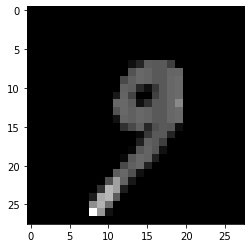

In [12]:
plt.imshow(x_test[1000], cmap="gray") # Import the image
plt.show() # Show the image

## Interface graphique

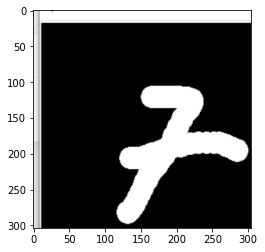

In [5]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')



def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "black", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        
        plt.imshow(im, cmap="gray") # Importation de l'image
        plt.show() # visualisation de la première image

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=12
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='white', outline='white')

app = App()
mainloop()